# WeatherPy — Ricardo M. Salas
----

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from random import uniform
from pprint import pprint 
import logging
from scipy import stats

from config import api_key
from citipy import citipy

# Output File (CSV)

url = "http://api.openweathermap.org/data/2.5/weather?"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# Let's create several lists for holding lat_lngs and cities
lat_lngs = []
cities = []
name = []
country_code = []

# Create a set of random lat and lng combinations
#The "np.random.uniform function" is used to draw samples from a uniform distribution.
#WE MUST MAKE SURE TO CHANGE THE SIZE OF THE SAMPLE, DOWN FROM 1,500 TO 500, IN "SIZE"

lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)

#The Zip function is used for iterating tubples (whatever that means).
lat_lngs = zip(lats, lngs)
lat_lngs=list(lat_lngs)
len(lat_lngs)

# This loop will help to identify the nearest city for each lat, lng combination.
for coordinate_pair in lat_lngs:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    
# Append cities and country codes to their respective lists
for city in cities:
    country_code.append(city.country_code) 
    name.append(city.city_name)

# If the city is unique, then the code will add it to a our cities list like this:
if city not in cities:
    cities.append(city)
    
# Command to print the city count to confirm sufficient count:
len(cities)

500

# setting the retrieval url and appending retrieve data

# Performing API Calls:

In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temp = []
cloudiness = []
humidity = []
max_temp =[]
wind = []

# Retrieve data and print results from retrieval
print(f"Here are your 500 cities mate!\n-------------------------------")
#Setting up a counter to store values in loop. 
counter=0
for i in lat_lngs:
    counter=counter+1
    try:
        response = requests.get(url + "appid=" + api_key + "&units=metric&lat=" + str(i[0]) + "&lon=" + str(i[1])).json()
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])   
        
        print(f"Processing Record {counter} | {name[counter-1]}")
        
    except (requests.exceptions.HTTPError):
        
        print(f"Processing Record {counter} | {name[counter-1]}")
        print(f"City not found. Skipping....")
        
# Now let's store the accumulated data in a dictionary with a set of equivalent values:

lat,lon = map(list,zip(*lat_lngs))
weather_dict = {
    
    "City": name,
    "Country": country_code,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Cloudiness": cloudiness,
    "Humidity" : humidity,
    "Maximum temperature" : max_temp,
    "Wind speed" : wind
    
}

Here are your 500 cities mate!
-------------------------------
Processing Record 1 | ushuaia
Processing Record 2 | chandbali
Processing Record 3 | nikolskoye
Processing Record 4 | ambilobe
Processing Record 5 | ushuaia
Processing Record 6 | port said
Processing Record 7 | mahaicony
Processing Record 8 | lagoa
Processing Record 9 | vaini
Processing Record 10 | ushuaia
Processing Record 11 | albany
Processing Record 12 | busselton
Processing Record 13 | bilibino
Processing Record 14 | sikasso
Processing Record 15 | touros
Processing Record 16 | grand gaube
Processing Record 17 | cabo san lucas
Processing Record 18 | bluff
Processing Record 19 | mys shmidta
Processing Record 20 | mutare
Processing Record 21 | petropavlovsk-kamchatskiy
Processing Record 22 | pocoes
Processing Record 23 | portland
Processing Record 24 | vaini
Processing Record 25 | ostrovnoy
Processing Record 26 | provideniya
Processing Record 27 | batagay-alyta
Processing Record 28 | hermanus
Processing Record 29 | illoqqo

Processing Record 249 | makung
Processing Record 250 | victoria
Processing Record 251 | torbay
Processing Record 252 | hermanus
Processing Record 253 | trelew
Processing Record 254 | uyemskiy
Processing Record 255 | robertson
Processing Record 256 | colares
Processing Record 257 | bokspits
Processing Record 258 | rikitea
Processing Record 259 | atuona
Processing Record 260 | nizhneyansk
Processing Record 261 | doka
Processing Record 262 | mataura
Processing Record 263 | sao filipe
Processing Record 264 | bethel
Processing Record 265 | cap malheureux
Processing Record 266 | mataura
Processing Record 267 | bayreuth
Processing Record 268 | atuona
Processing Record 269 | thompson
Processing Record 270 | butaritari
Processing Record 271 | mataura
Processing Record 272 | bambous virieux
Processing Record 273 | khatanga
Processing Record 274 | sinnamary
Processing Record 275 | severo-kurilsk
Processing Record 276 | mar del plata
Processing Record 277 | rikitea
Processing Record 278 | yellowkn

Processing Record 496 | bredasdorp
Processing Record 497 | rikitea
Processing Record 498 | victoria
Processing Record 499 | taolanaro
Processing Record 500 | albany


### Let's convert te Raw Data into a DataFrame (must export to a .csv and display the dataframe)

In [30]:
# Let's create our dataframe as follows:
weatherdata = pd.DataFrame(weather_dict)
weatherdata.count()

City                   500
Country                500
Latitude               500
Longitude              500
Temperature            500
Cloudiness             500
Humidity               500
Maximum temperature    500
Wind speed             500
dtype: int64

In [31]:
# Export to CVS and a short preview with the .head function
weatherdata.to_csv('wheatherman.csv')
weatherdata.head()

,City,Country,Latitude,Longitude,Temperature,Cloudiness,Humidity,Maximum temperature,Wind speed
0,ushuaia,ar,-53.717877,-54.992414,2.85,100,91,2.85,5.92
1,chandbali,in,20.587009,87.547350,30.05,87,80,30.05,11.69
2,nikolskoye,ru,43.033155,176.028722,10.05,100,91,10.05,3.27
3,ambilobe,mg,-10.299787,51.841426,25.55,34,77,25.55,11.48
4,ushuaia,ar,-75.059841,-81.765620,-23.05,100,100,-23.05,5.86


### Plotting the Data

#### Latitude vs. Temperature Plot

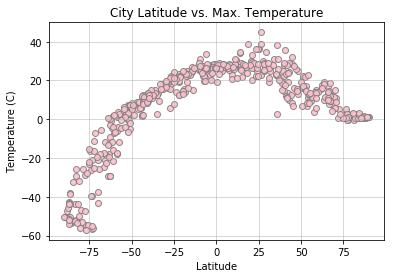

In [41]:
fig, ax = plt.subplots()


plt.scatter(lat, max_temp, marker="o", facecolors="pink", edgecolors="grey", alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Max. Temperature')

plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
fig.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

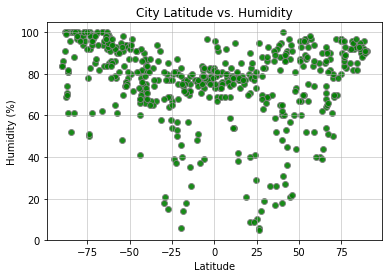

In [39]:
fig, ax = plt.subplots()

plt.scatter(lat, humidity, marker="o", facecolors="green", edgecolors="grey", alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Humidity')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
fig.savefig("LatvsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

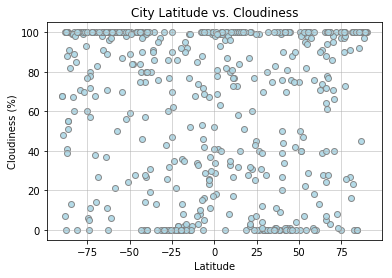

In [38]:
fig, ax = plt.subplots()

plt.scatter(lat, cloudiness, marker="o", facecolors="lightblue", edgecolors="grey", alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Cloudiness')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
fig.savefig('LatvsCloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

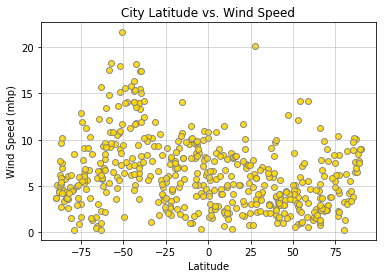

In [40]:
fig, ax = plt.subplots()

plt.scatter(lat, wind, marker="o", facecolors="gold", edgecolors="grey", alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Wind Speed')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mhp)')
fig.savefig("LatvsWind.png")
plt.show()

# MAIN OBSERVABLE CONCLUSIONS FROM DATASET

In [18]:
#1)The most salient pattern –particularly from looking at the charts– is that the overall temperature, indeed, increases as we approach the equator. So that's clear.

In [19]:
#2)Another noteworthy conclusion is that latitude and cloudiness seem to be the least correlated variables. There doesn't seem to be any relation depending of closeness to the equator!

In [20]:
#3)Finally, wind speed and humidity also don't seem to show any clear relation in terms of latitude. 

In [21]:
#4)The only clear conclusion is that temperature increases approaching the equator, all other variables don't show significant changes.